In [1]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 748 kB 54.3 MB/s 
     |████████████████████████████████| 1.6 MB 39.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755851 sha256=b1da11acd4a30f139a89dc321da47ba8ba1d3ede72e949003c155006e029c7f3
  Stored in directory: /root/.cache/pip/wheels/12/17/67/179b65f101f0d0236e67b2fa039e5d387806348e80205c6985
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23611 sha256=0732a5f47651c147419d1f687eaba02cdcf3f223a309543b2aff9b20993cb8c9
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [1]:
import pandas as pd
from datetime import datetime
import pm4py
from itertools import product

In [34]:
# # ABC*D
# data = [
#     ["A", "B", "D"],
#     ["A", "B", "C", "D"],
#     ["A", "B", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "C", "C", "D"],
# ]

# # manhattan ABC, XYZ, S, E
# data = [
    
# ]
# n=3
# for i in range(4):
#   for j in range(i,4):
#     for k in range(j,4):
#        l = ["A", "B", "C"]
#        l = l[:i] + ["X"] + l[i:j] + ["Y"] + l[j:k] + ["Z"] + l[k:] 
#        w = ["S1","S2"] + l + ["E1","E2"]
#        data.append(w)


# # AB(CC)*D
# data = [
#     ["A", "B", "D"],
#     ["A", "B", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "C", "C", "D"],
#     ["A", "B", "C", "C", "C", "C", "C", "C", "C", "C", "D"],
# ]

# AB(CD)*E
data = [
    ["A", "B", "E"],
    ["A", "B", "C", "D", "E"],
    ["A", "B", "C", "D", "C", "D", "E"],
    ["A", "B", "C", "D", "C", "D", "C", "D", "E"],
    ["A", "B", "C", "D", "C", "D", "C", "D", "C", "D", "E"],
    ["A", "B", "C", "D", "C", "D", "C", "D", "C", "D", "C", "D", "E"],
]

# # ABC example -> even As, even Bs, 2 Bs in a row
# data = []
# for i in range(1,7):
#   for w in product('ABC', repeat=i):
#     if w.count("A") % 2 == 0 and w.count("B") % 2 == 0 and "BB" in "".join(w):
#       data.append(w)



In [35]:
df = pd.DataFrame(columns=['case', 'activity', 'timestamp'])
for i, case in enumerate(data):
    for activity in case:
        df = df.append({'case': i, 'activity': activity, 'timestamp': datetime.now()}, ignore_index=True)
dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

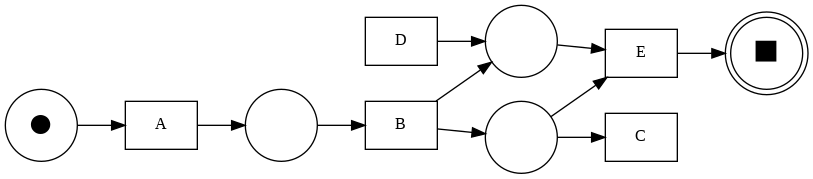

In [36]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

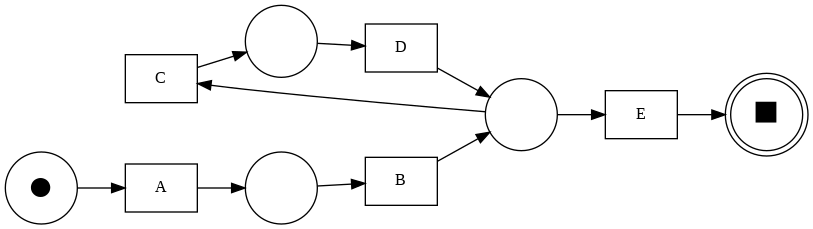

In [37]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha_plus(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

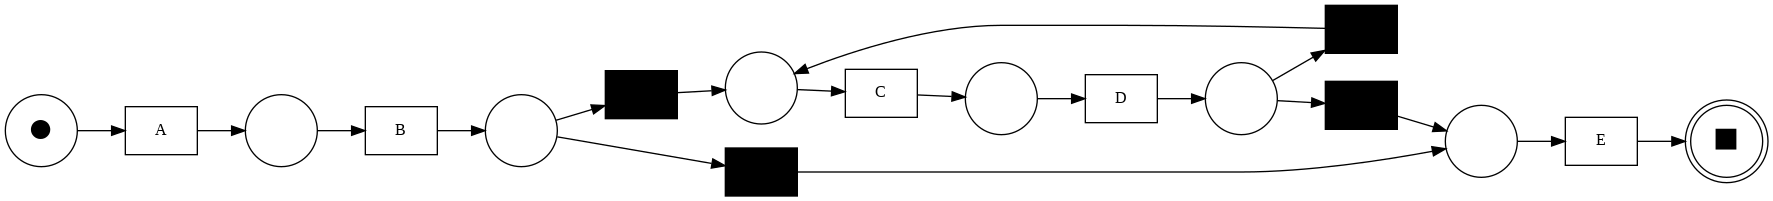

In [38]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

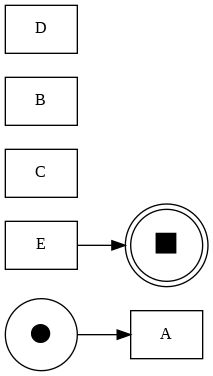

In [40]:
net, initial_marking, final_marking = pm4py.discover_petri_net_heuristics(event_log, dependency_threshold=0.99)
pm4py.view_petri_net(net, initial_marking, final_marking)